In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-05T16:08:13.098309+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
seaborn: 0.13.2
teeplot: 1.4.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.4900333881378174}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.004030704498291016}
!!! {"init_...": 0.0006077289581298828}
!!! {"ete3Tree": 0.6693336963653564}
!!! {"GenomeTree_hierarchical": 0.0029268264770507812}
!!! {"mutateBranchETEhierarchy": 0.09559369087219238}
!!! {"write_genome_short": 0.0504145622253418}


  4%|▍         | 8/193 [00:03<00:54,  3.38it/s]

!!! {"writeGenomeNoIndels": 0.171586275100708}
!!! {"pl.DataFrame": 0.04492306709289551}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.0452706813812256}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.017606735229492188}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 3.3855438232421875e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003378629684448242}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001461505889892578}
!!! {"init_...": 0.0004992485046386719}
!!! {"ete3Tree": 8.0108642578125e-05}
!!! {"GenomeTree_hierarchical": 0.002198457717895508}
!!! {"mutateBranchETEhierarchy": 1.5020370483398438e-05}
!!! {"write_genome_short": 7.2479248046875e-05}

  8%|▊         | 15/193 [00:03<00:24,  7.25it/s]

!!! {"phastSimRun": 0.0001366138458251953}
!!! {"init_...": 0.0005602836608886719}
!!! {"ete3Tree": 7.104873657226562e-05}
!!! {"GenomeTree_hierarchical": 0.002100706100463867}
!!! {"mutateBranchETEhierarchy": 1.1920928955078125e-05}
!!! {"write_genome_short": 6.914138793945312e-05}
!!! {"writeGenomeNoIndels": 1.0251998901367188e-05}
!!! {"pl.DataFrame": 7.176399230957031e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005082368850708008}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000194549560546875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=166, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0034322738647460938}
enter log_context_duration for 

 13%|█▎        | 26/193 [00:03<00:11, 14.51it/s]

!!! {"mutateBranchETEhierarchy": 0.005614757537841797}
!!! {"write_genome_short": 0.002499103546142578}
!!! {"writeGenomeNoIndels": 0.007928133010864258}
!!! {"pl.DataFrame": 0.001577615737915039}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04310035705566406}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009515285491943359}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032129287719726562}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013637542724609375}
!!! {"init_...": 0.000469207763671875}
!!! {"ete3Tree": 7.104873657226562e-05}
!!! {"GenomeTree_hierarchical": 0.00213170051

 21%|██        | 40/193 [00:03<00:05, 26.74it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003571033477783203}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010514259338378906}
!!! {"init_...": 0.0004203319549560547}
!!! {"ete3Tree": 5.817413330078125e-05}
!!! {"GenomeTree_hierarchical": 0.002680540084838867}
!!! {"mutateBranchETEhierarchy": 9.5367431640625e-06}
!!! {"write_genome_short": 7.62939453125e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 6.866455078125e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005293607711791992}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00021123886108398438}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_as

 24%|██▍       | 46/193 [00:03<00:04, 29.81it/s]

!!! {"ete3Tree": 0.02184295654296875}
!!! {"GenomeTree_hierarchical": 0.0026335716247558594}
!!! {"mutateBranchETEhierarchy": 0.004809856414794922}
!!! {"write_genome_short": 0.0023317337036132812}
!!! {"writeGenomeNoIndels": 0.008545160293579102}
!!! {"pl.DataFrame": 0.0016472339630126953}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04425764083862305}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009913444519042969}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031020641326904297}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015926361083984375}
!!! {"init_...": 0.0004565715

 31%|███       | 59/193 [00:04<00:03, 39.83it/s]

!!! {"phastSimRun": 0.00015354156494140625}
!!! {"init_...": 0.0006990432739257812}
!!! {"ete3Tree": 9.34600830078125e-05}
!!! {"GenomeTree_hierarchical": 0.0023527145385742188}
!!! {"mutateBranchETEhierarchy": 1.8358230590820312e-05}
!!! {"write_genome_short": 8.821487426757812e-05}
!!! {"writeGenomeNoIndels": 1.4066696166992188e-05}
!!! {"pl.DataFrame": 0.00012564659118652344}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0060062408447265625}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003459453582763672}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=37, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003308534622192383}
enter log_context_duration fo

 37%|███▋      | 71/193 [00:04<00:02, 45.91it/s]

!!! {"init_...": 0.0009326934814453125}
!!! {"ete3Tree": 9.250640869140625e-05}
!!! {"GenomeTree_hierarchical": 0.0023450851440429688}
!!! {"mutateBranchETEhierarchy": 1.4543533325195312e-05}
!!! {"write_genome_short": 0.00047135353088378906}
!!! {"writeGenomeNoIndels": 8.344650268554688e-06}
!!! {"pl.DataFrame": 0.00012350082397460938}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005928754806518555}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00037217140197753906}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=16, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003233671188354492}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00

 40%|███▉      | 77/193 [00:04<00:02, 47.12it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0045146942138671875}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012826919555664062}
!!! {"init_...": 0.0004379749298095703}
!!! {"ete3Tree": 0.0016374588012695312}
!!! {"GenomeTree_hierarchical": 0.003015756607055664}
!!! {"mutateBranchETEhierarchy": 0.0003380775451660156}
!!! {"write_genome_short": 0.0002598762512207031}
!!! {"writeGenomeNoIndels": 0.0005712509155273438}
!!! {"pl.DataFrame": 0.00020623207092285156}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.008344650268554688}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00029087066650390625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as

 43%|████▎     | 83/193 [00:04<00:02, 38.23it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008847951889038086}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013256072998046875}
!!! {"init_...": 0.00047588348388671875}
!!! {"ete3Tree": 0.01982426643371582}
!!! {"GenomeTree_hierarchical": 0.0020978450775146484}
!!! {"mutateBranchETEhierarchy": 0.004935741424560547}
!!! {"write_genome_short": 0.0024709701538085938}
!!! {"writeGenomeNoIndels": 0.00826406478881836}
!!! {"pl.DataFrame": 0.0017342567443847656}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04176068305969238}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009660720825195312}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newi

 50%|█████     | 97/193 [00:05<00:02, 44.21it/s]

!!! {"ete3Tree": 0.026179075241088867}
!!! {"GenomeTree_hierarchical": 0.002627134323120117}
!!! {"mutateBranchETEhierarchy": 0.006099224090576172}
!!! {"write_genome_short": 0.0031654834747314453}
!!! {"writeGenomeNoIndels": 0.010370731353759766}
!!! {"pl.DataFrame": 0.0026154518127441406}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05362224578857422}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0011701583862304688}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003209829330444336}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001385211944580078}
!!! {"init_...": 0.000460147857

 56%|█████▋    | 109/193 [00:05<00:01, 47.33it/s]

!!! {"ete3Tree": 0.011457204818725586}
!!! {"GenomeTree_hierarchical": 0.002069711685180664}
!!! {"mutateBranchETEhierarchy": 0.002378225326538086}
!!! {"write_genome_short": 0.0016374588012695312}
!!! {"writeGenomeNoIndels": 0.004479408264160156}
!!! {"pl.DataFrame": 0.0008976459503173828}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.02512979507446289}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006368160247802734}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=13, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003090381622314453}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012350082397460938}
!!! {"init_...": 0.0004477500

 63%|██████▎   | 121/193 [00:05<00:01, 48.21it/s]

!!! {"phastSimRun": 0.0001583099365234375}
!!! {"init_...": 0.0006952285766601562}
!!! {"ete3Tree": 8.249282836914062e-05}
!!! {"GenomeTree_hierarchical": 0.0030303001403808594}
!!! {"mutateBranchETEhierarchy": 1.5974044799804688e-05}
!!! {"write_genome_short": 0.00010037422180175781}
!!! {"writeGenomeNoIndels": 1.049041748046875e-05}
!!! {"pl.DataFrame": 0.00011444091796875}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006536006927490234}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0018548965454101562}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031931400299072266}
enter log_context_duration for _d

 66%|██████▌   | 127/193 [00:05<00:01, 48.80it/s]

!!! {"phastSimRun": 0.00015401840209960938}
!!! {"init_...": 0.0006482601165771484}
!!! {"ete3Tree": 7.748603820800781e-05}
!!! {"GenomeTree_hierarchical": 0.002338409423828125}
!!! {"mutateBranchETEhierarchy": 2.8371810913085938e-05}
!!! {"write_genome_short": 7.581710815429688e-05}
!!! {"writeGenomeNoIndels": 7.62939453125e-06}
!!! {"pl.DataFrame": 0.00013017654418945312}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00578761100769043}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00033593177795410156}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032532215118408203}
enter log_context_duration for _do_

 72%|███████▏  | 139/193 [00:05<00:01, 53.60it/s]

!!! {"write_genome_short": 0.0005941390991210938}
!!! {"writeGenomeNoIndels": 2.0503997802734375e-05}
!!! {"pl.DataFrame": 0.0001277923583984375}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005570173263549805}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002956390380859375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032002925872802734}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013113021850585938}
!!! {"init_...": 0.00044083595275878906}
!!! {"ete3Tree": 7.748603820800781e-05}
!!! {"GenomeTree_hierarchical": 0.0022149085998535156}
!!! {"mutateBranchETEhierarchy": 1.502

 76%|███████▌  | 146/193 [00:05<00:00, 55.96it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033600330352783203}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013303756713867188}
!!! {"init_...": 0.00042176246643066406}
!!! {"ete3Tree": 6.508827209472656e-05}
!!! {"GenomeTree_hierarchical": 0.002259969711303711}
!!! {"mutateBranchETEhierarchy": 1.1205673217773438e-05}
!!! {"write_genome_short": 8.249282836914062e-05}
!!! {"writeGenomeNoIndels": 1.0728836059570312e-05}
!!! {"pl.DataFrame": 8.559226989746094e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004624605178833008}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000

 81%|████████▏ | 157/193 [00:06<00:00, 42.64it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032079219818115234}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012159347534179688}
!!! {"init_...": 0.0004401206970214844}
!!! {"ete3Tree": 8.893013000488281e-05}
!!! {"GenomeTree_hierarchical": 0.0024962425231933594}
!!! {"mutateBranchETEhierarchy": 1.5974044799804688e-05}
!!! {"write_genome_short": 9.179115295410156e-05}
!!! {"writeGenomeNoIndels": 3.62396240234375e-05}
!!! {"pl.DataFrame": 8.869171142578125e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004921674728393555}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00021

 84%|████████▍ | 162/193 [00:07<00:02, 10.49it/s]

!!! {"mutateBranchETEhierarchy": 0.04906320571899414}
!!! {"write_genome_short": 0.026538372039794922}
!!! {"writeGenomeNoIndels": 0.07713150978088379}
!!! {"pl.DataFrame": 0.012822866439819336}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.3426034450531006}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.006005525588989258}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003251791000366211}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014162063598632812}
!!! {"init_...": 0.0004897117614746094}
!!! {"ete3Tree": 8.726119995117188e-05}
!!! {"GenomeTree_hierarchical": 0.002233982086181

 86%|████████▌ | 166/193 [00:07<00:02, 12.59it/s]

!!! {"write_genome_short": 0.0009582042694091797}
!!! {"writeGenomeNoIndels": 0.001550912857055664}
!!! {"pl.DataFrame": 0.0003654956817626953}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.011683225631713867}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00035858154296875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=1503, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0054395198822021484}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012302398681640625}
!!! {"init_...": 0.0004353523254394531}
!!! {"ete3Tree": 0.00926351547241211}
!!! {"GenomeTree_hierarchical": 0.00201416015625}
!!! {"mutateBranchETEhierarchy": 0.00209546089172

 92%|█████████▏| 178/193 [00:08<00:00, 20.11it/s]

!!! {"ete3Tree": 0.06357836723327637}
!!! {"GenomeTree_hierarchical": 0.002038717269897461}
!!! {"mutateBranchETEhierarchy": 0.015681982040405273}
!!! {"write_genome_short": 0.007508993148803711}
!!! {"writeGenomeNoIndels": 0.02553558349609375}
!!! {"pl.DataFrame": 0.004617929458618164}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.1215357780456543}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0024154186248779297}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003309011459350586}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001392364501953125}
!!! {"init_...": 0.00048422813415527

 95%|█████████▍| 183/193 [00:08<00:00, 23.85it/s]

!!! {"ete3Tree": 0.009156227111816406}
!!! {"GenomeTree_hierarchical": 0.002722501754760742}
!!! {"mutateBranchETEhierarchy": 0.0022323131561279297}
!!! {"write_genome_short": 0.001434326171875}
!!! {"writeGenomeNoIndels": 0.0036649703979492188}
!!! {"pl.DataFrame": 0.0007486343383789062}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0222623348236084}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005390644073486328}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031130313873291016}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012087821960449219}
!!! {"init_...": 0.0004637241363

100%|██████████| 193/193 [00:08<00:00, 22.51it/s]

!!! {"phastSimRun": 0.00013184547424316406}
!!! {"init_...": 0.0006623268127441406}
!!! {"ete3Tree": 7.033348083496094e-05}
!!! {"GenomeTree_hierarchical": 0.0021190643310546875}
!!! {"mutateBranchETEhierarchy": 1.1444091796875e-05}
!!! {"write_genome_short": 7.486343383789062e-05}
!!! {"writeGenomeNoIndels": 7.3909759521484375e-06}
!!! {"pl.DataFrame": 8.535385131835938e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005289316177368164}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002751350402832031}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=25, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003155231475830078}
enter log_context_duration for _do

exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.26427531242370605}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.03297305107116699}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.006206512451171875}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 5.0067901611328125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03368330001831055}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.001998424530029297}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002796649932861328}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.1457672119140625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03296637535095215}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0027463436126708984}
enter log_context_duration for seq_

 43%|████▎     | 3/7 [00:00<00:00, 22.29it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03366851806640625}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003475189208984375}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003149747848510742}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03326272964477539}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003405332565307617}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0027704238891601562}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for misma

100%|██████████| 7/7 [00:00<00:00, 23.42it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.0335237979888916}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0038428306579589844}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.001531362533569336}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.020756006240844727}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0029306411743164062}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.3833622932434082}


sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.28228759765625}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 4086/4086 [00:25<00:00, 158.08it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 29.39300274848938}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 608.42it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 142.79984951019287}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.06856393814086914}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 204.34095358848572}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.009260416030883789}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.00035572052001953125}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.00042319297790527344}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.000408172607421875}
ancestral


100%|██████████| 368/368 [00:00<00:00, 283680.18it/s]

process mutations:   0%|          | 1/368 [00:00<01:17,  4.75it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:18<14:16,  2.38s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   21.0s



process mutations:  13%|█▎        | 48/368 [01:12<07:49,  1.47s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.3min



process mutations:  24%|██▍       | 88/368 [02:06<06:32,  1.40s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  2.3min



process mutations:  35%|███▍      | 128/368 [03:01<05:33,  1.39s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  3.3min



process mutations:  46%|████▌     | 168/368 [03:57<04:39,  1.40s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  4.2min



process mutations:  57%|█████▋    | 208/368 [04:51<03:40,  1.38s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  5.1min



process mutations:  67%|██████▋   | 248/368 [05:46<02:45,  1.38s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  6.1min



process mutations:  78%|███████▊  | 288/368 [06:42<01:50,  1.38s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  7.0min



process mutations:  89%|████████▉ | 328/368 [07:38<00:55,  1.39s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  7.9min



process mutations: 100%|██████████| 368/368 [08:36<00:00,  1.40s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  8.6min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  8.8min finished


process replicate: 100%|██████████| 1/1 [12:16<00:00, 736.26s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.09632539749145508}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 113
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> 'f37819ac-d3be-8ff2-88b0-58d9d734fb2c', 'f37819ac-d3be-8ff2-88b0-58d9d734fb2c', 'f37819ac-d3be-8ff2-88b0-58d9d7
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


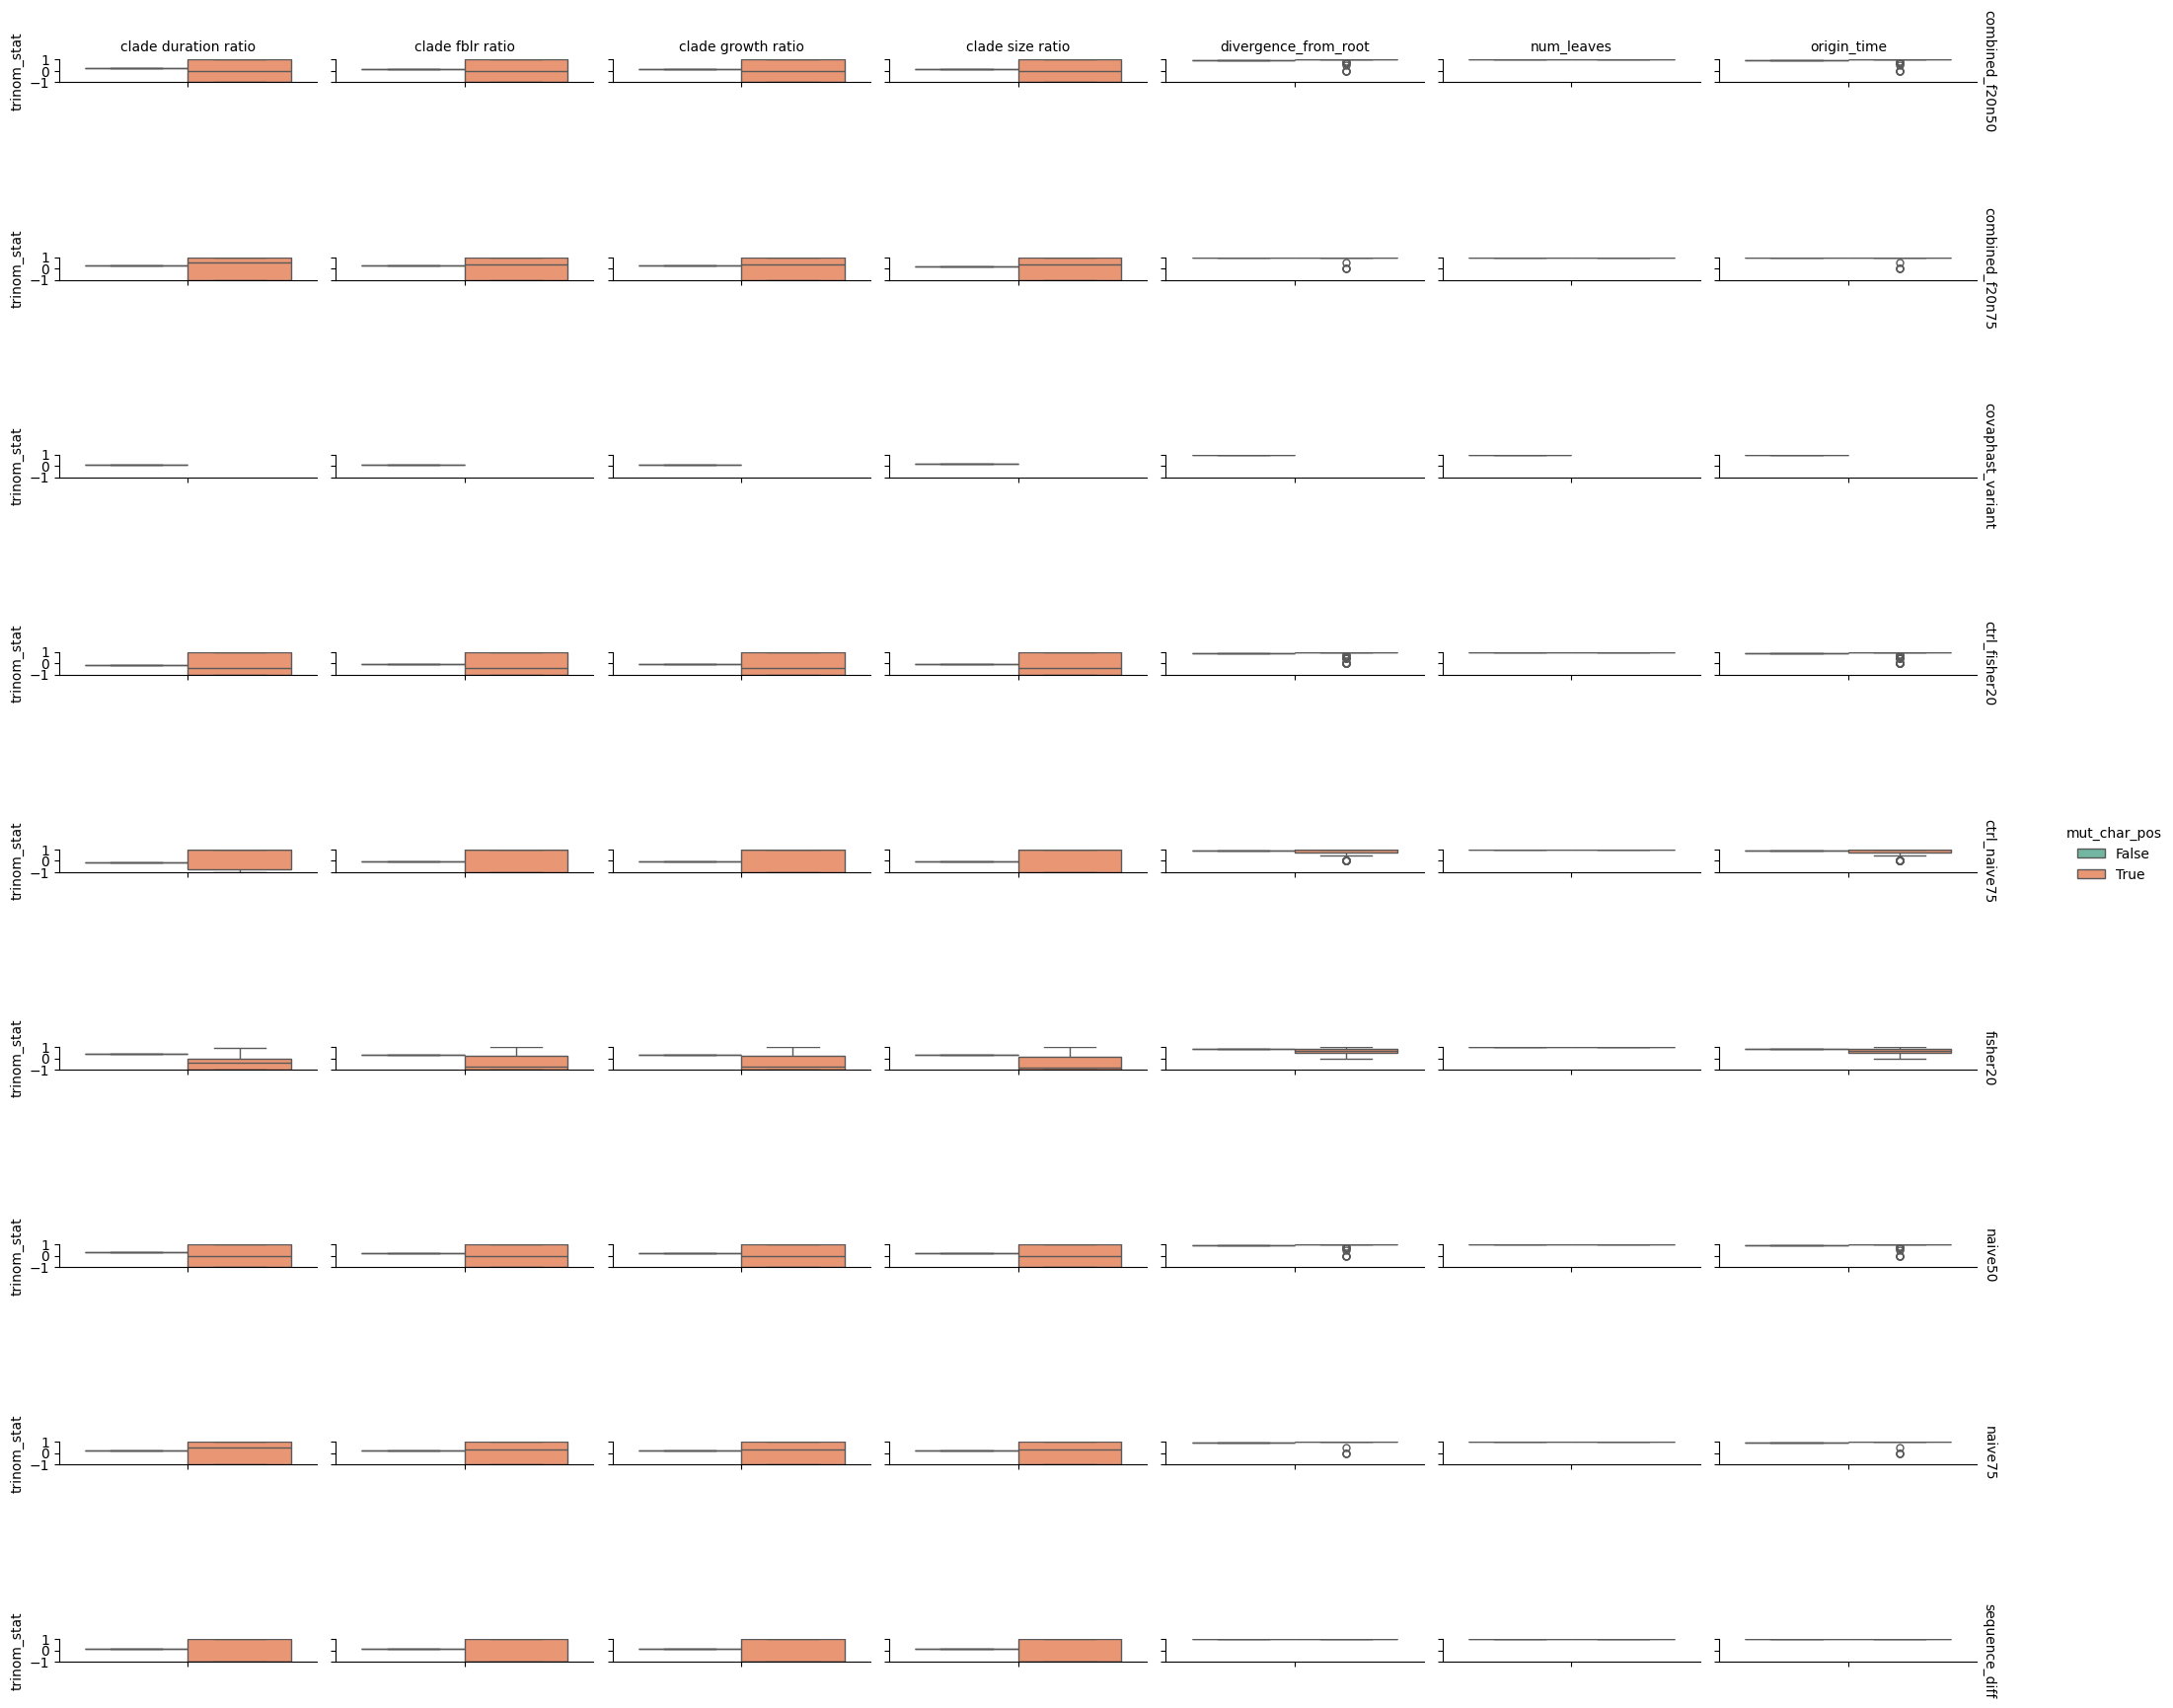

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


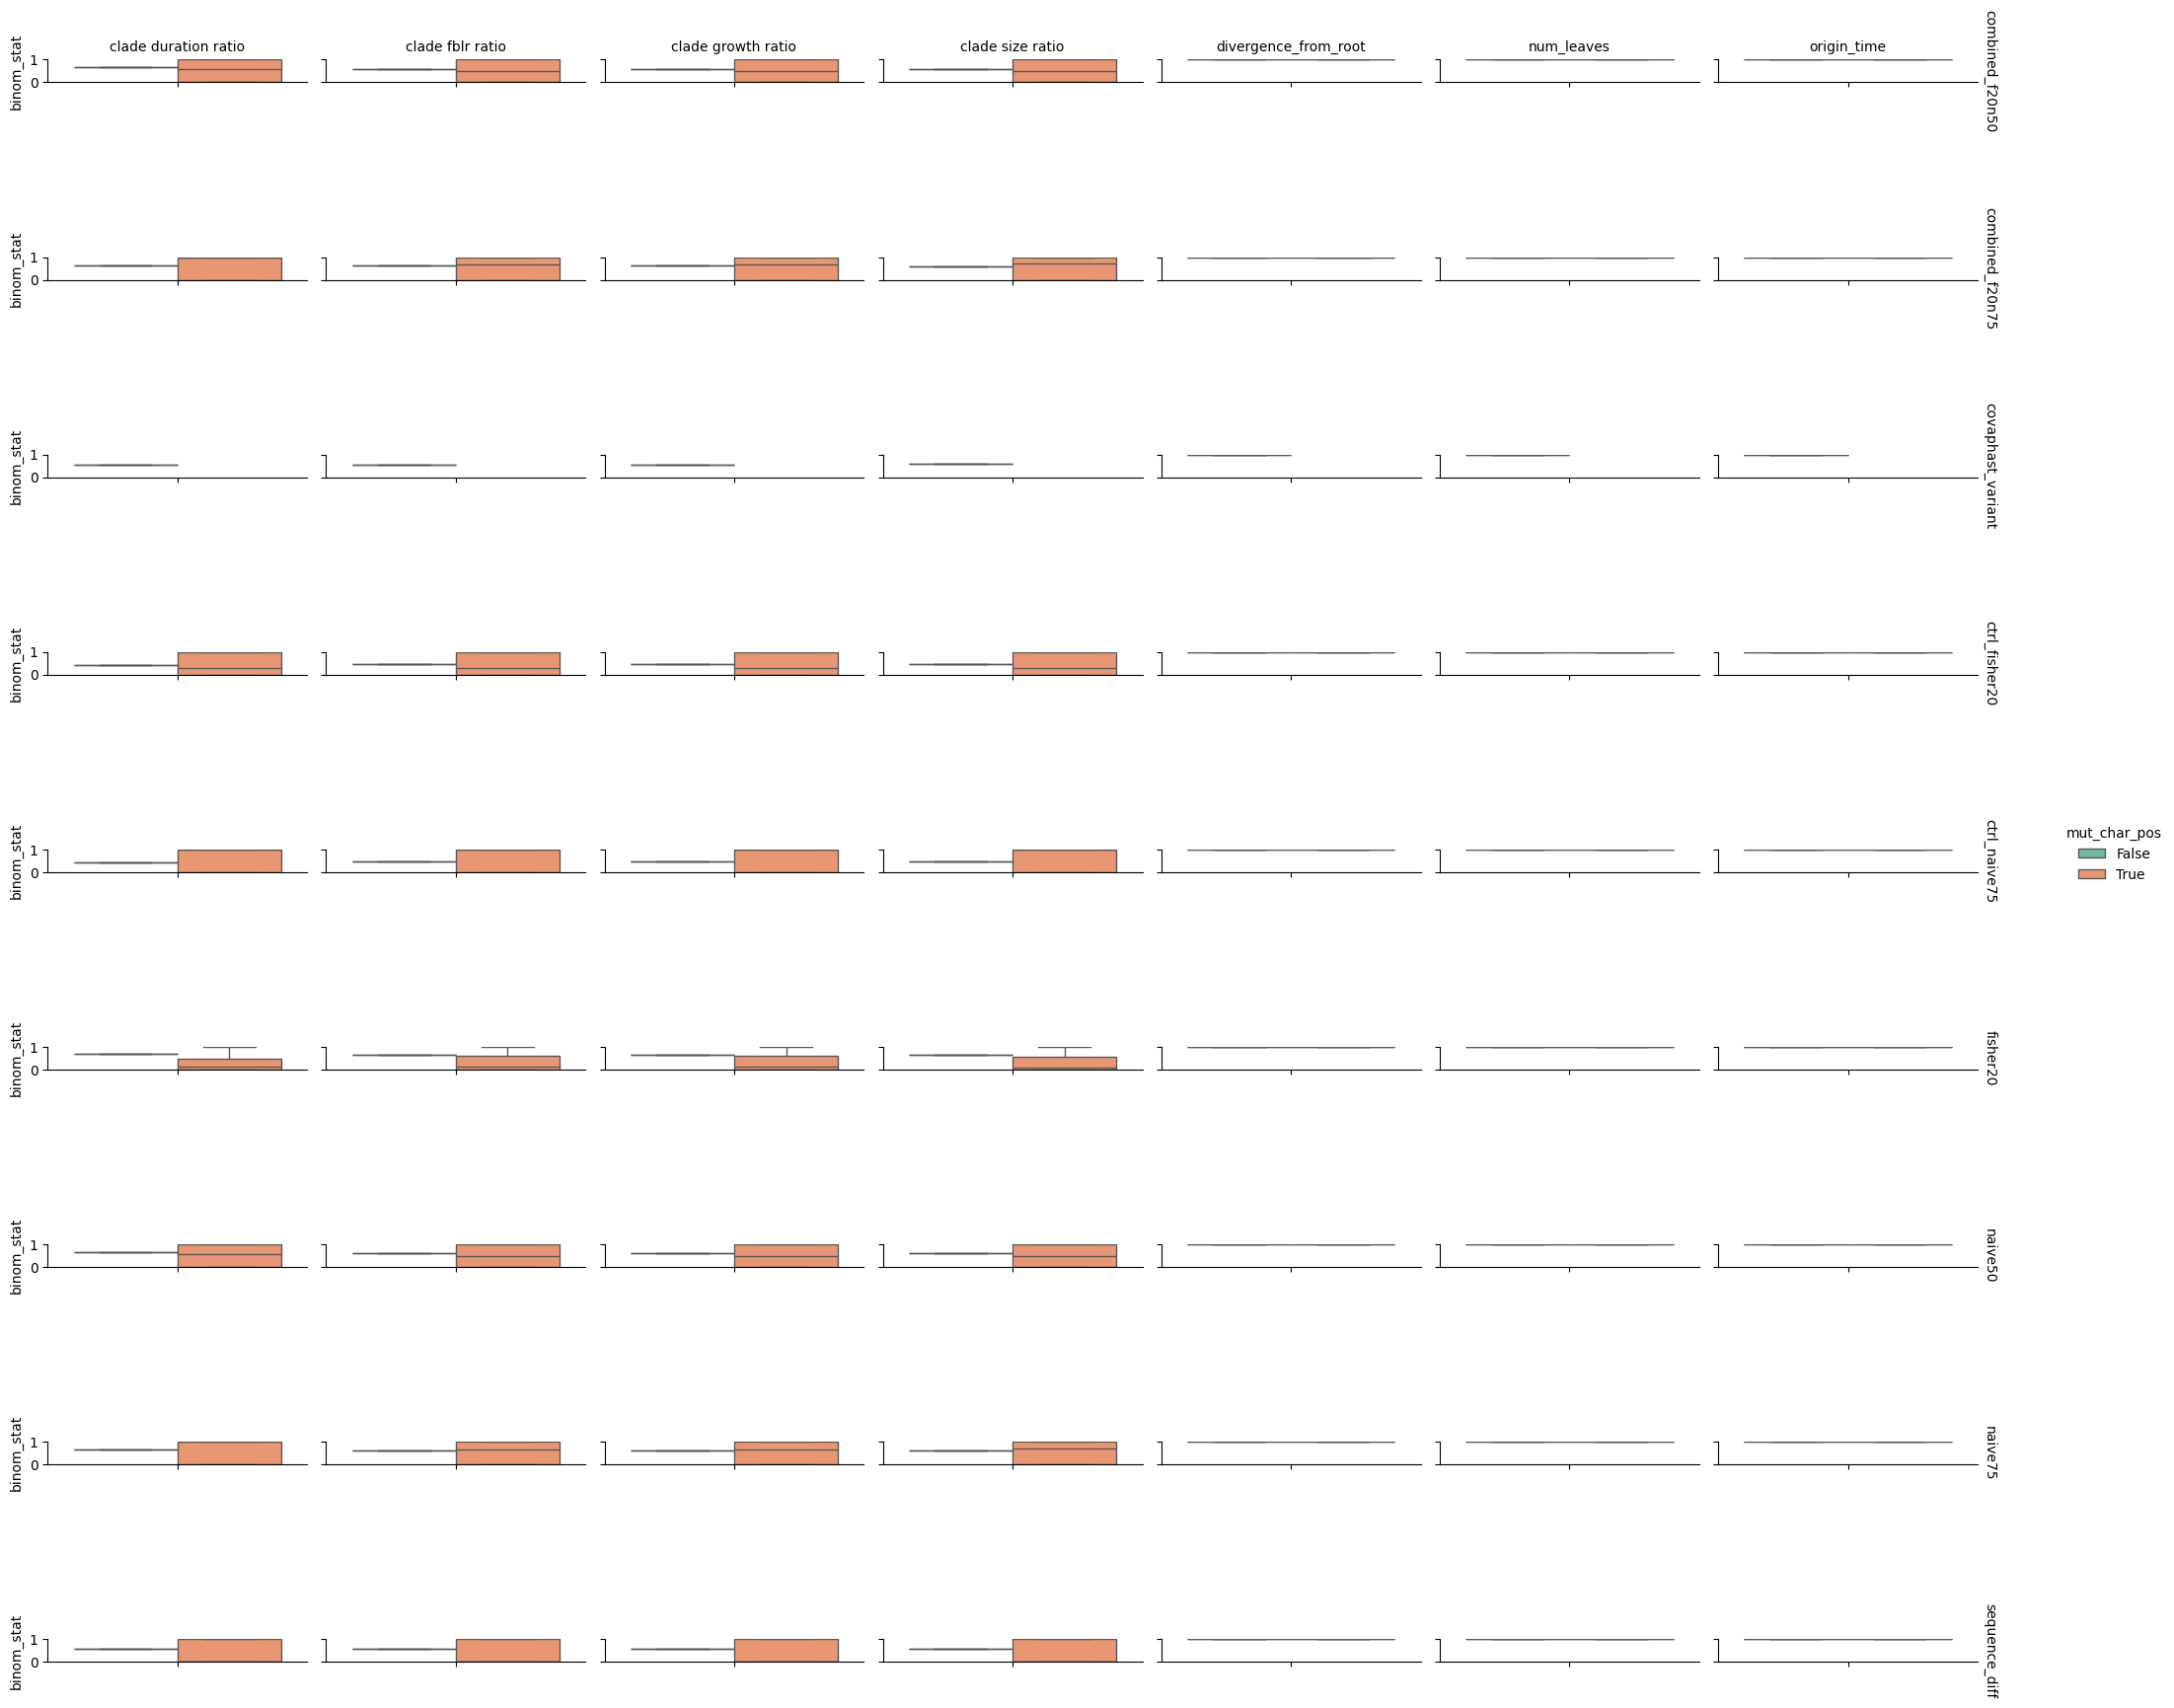

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


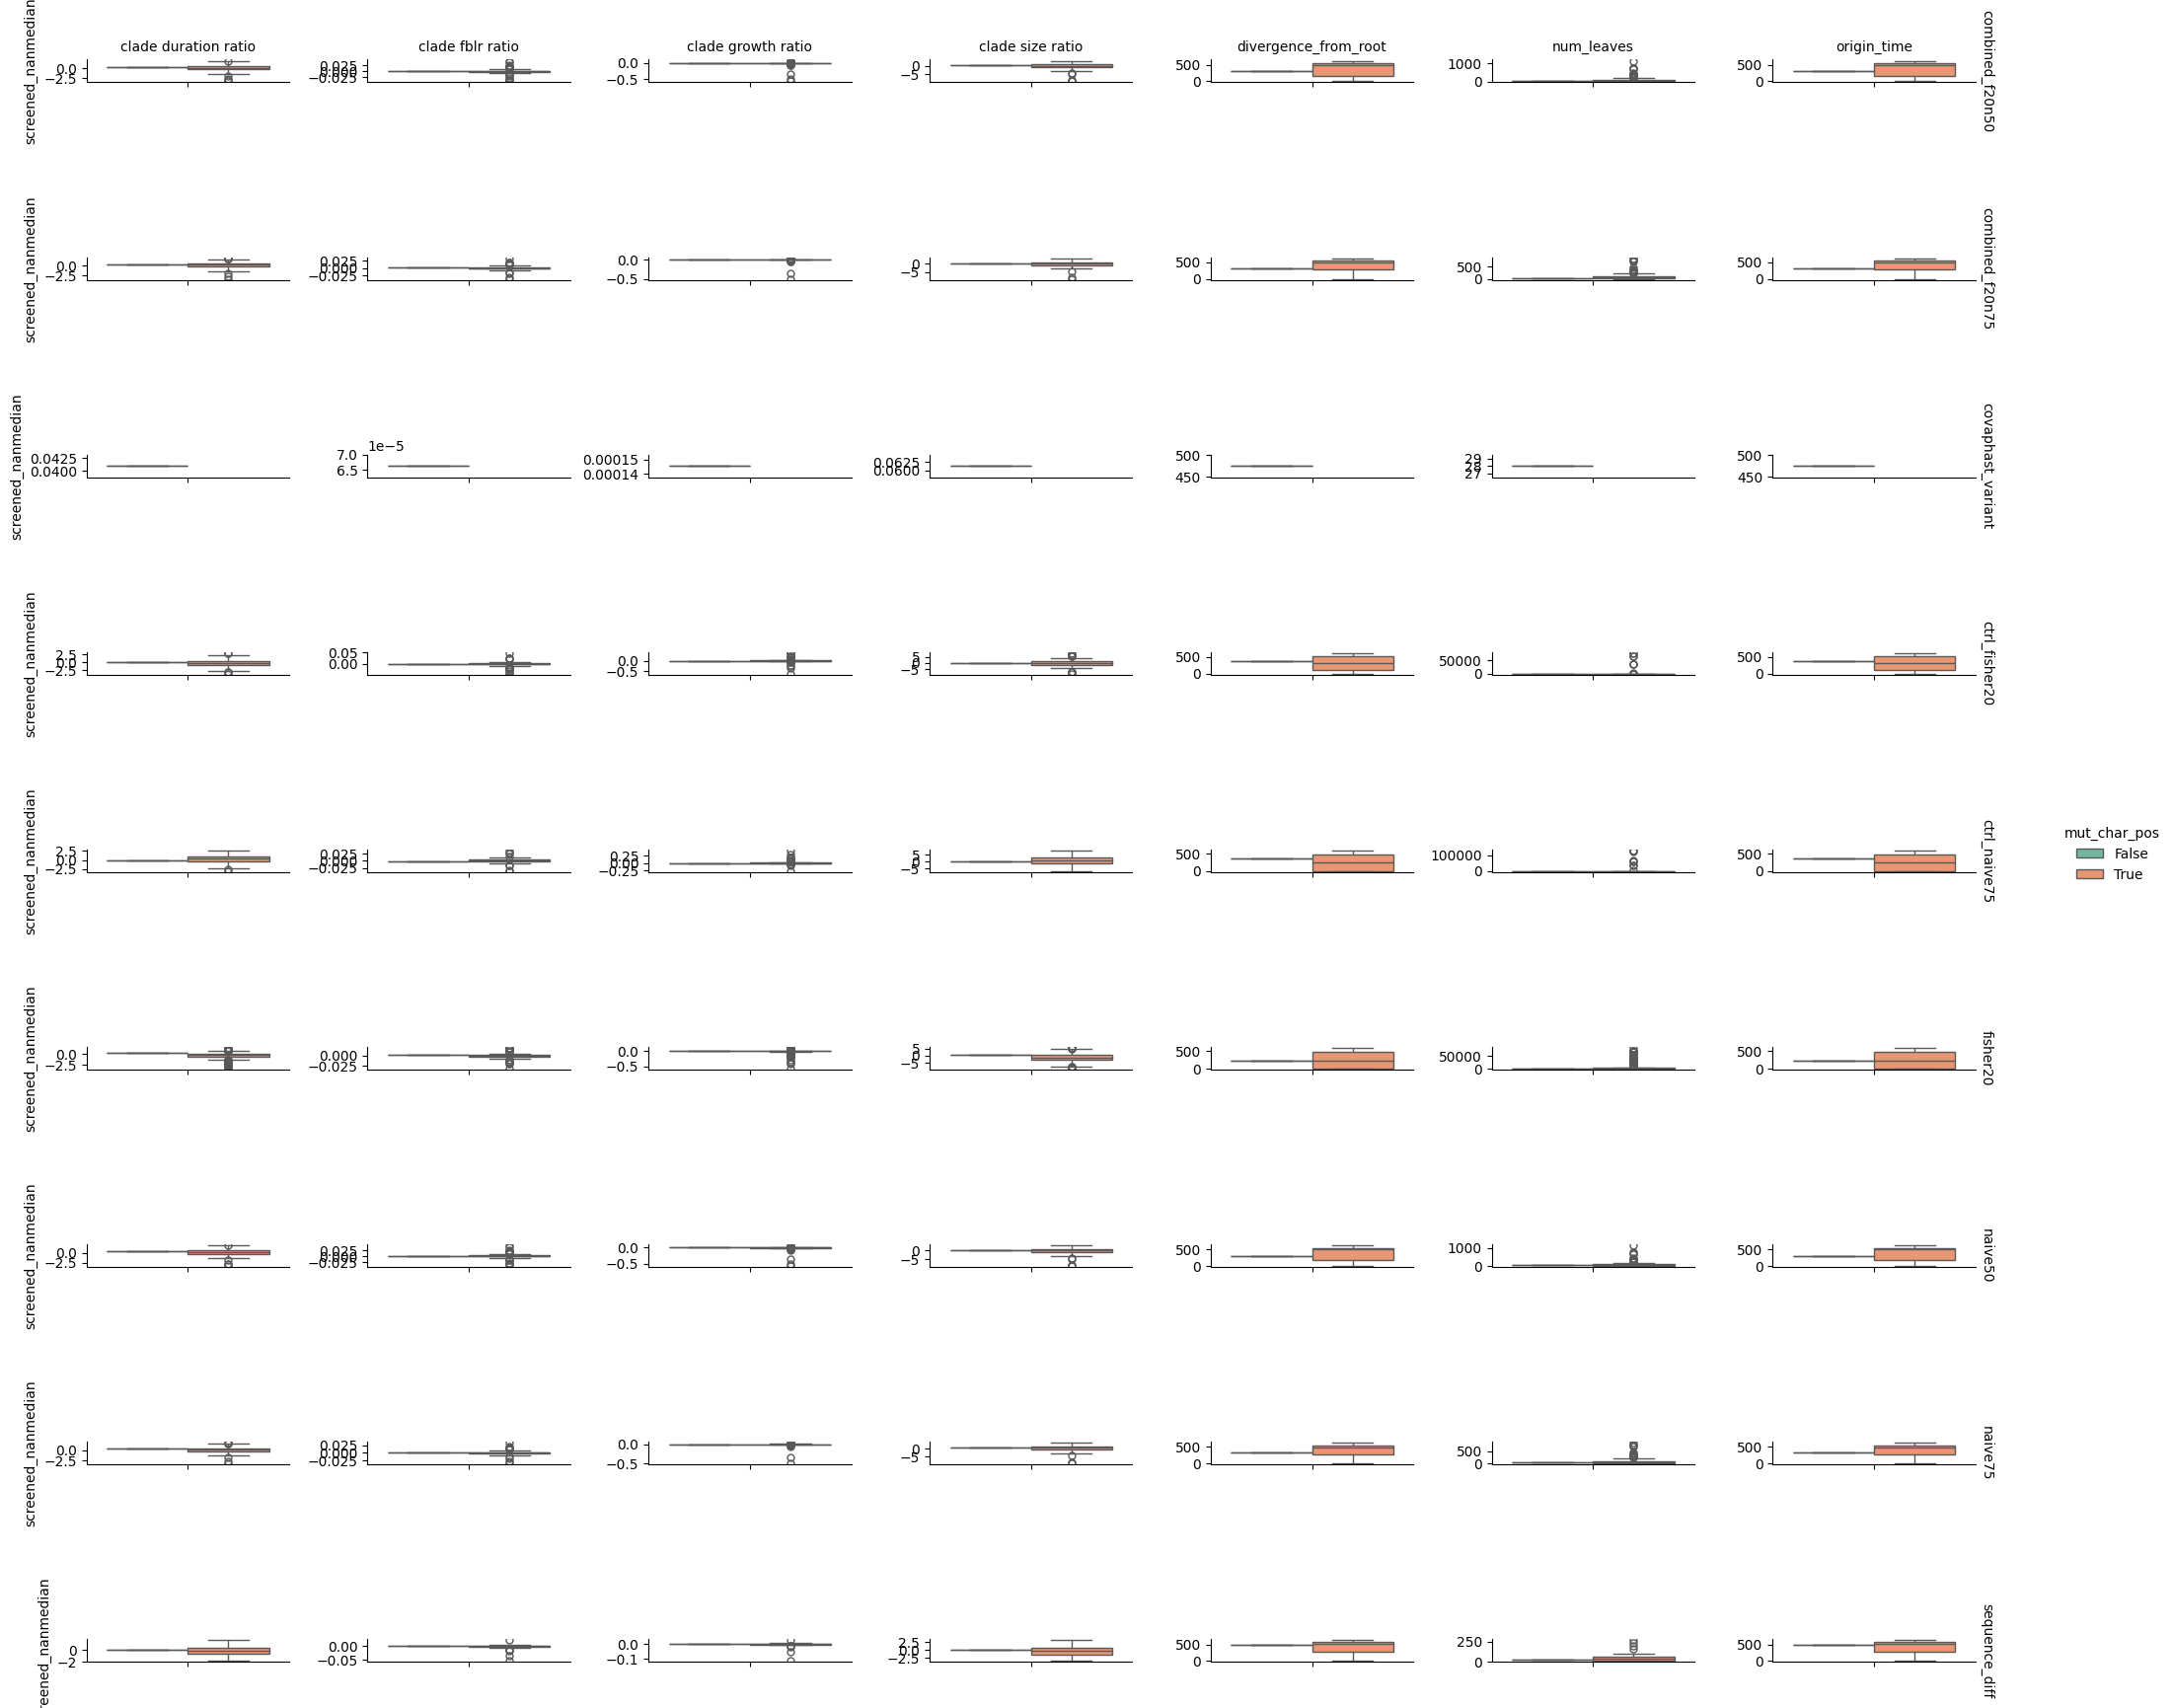

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


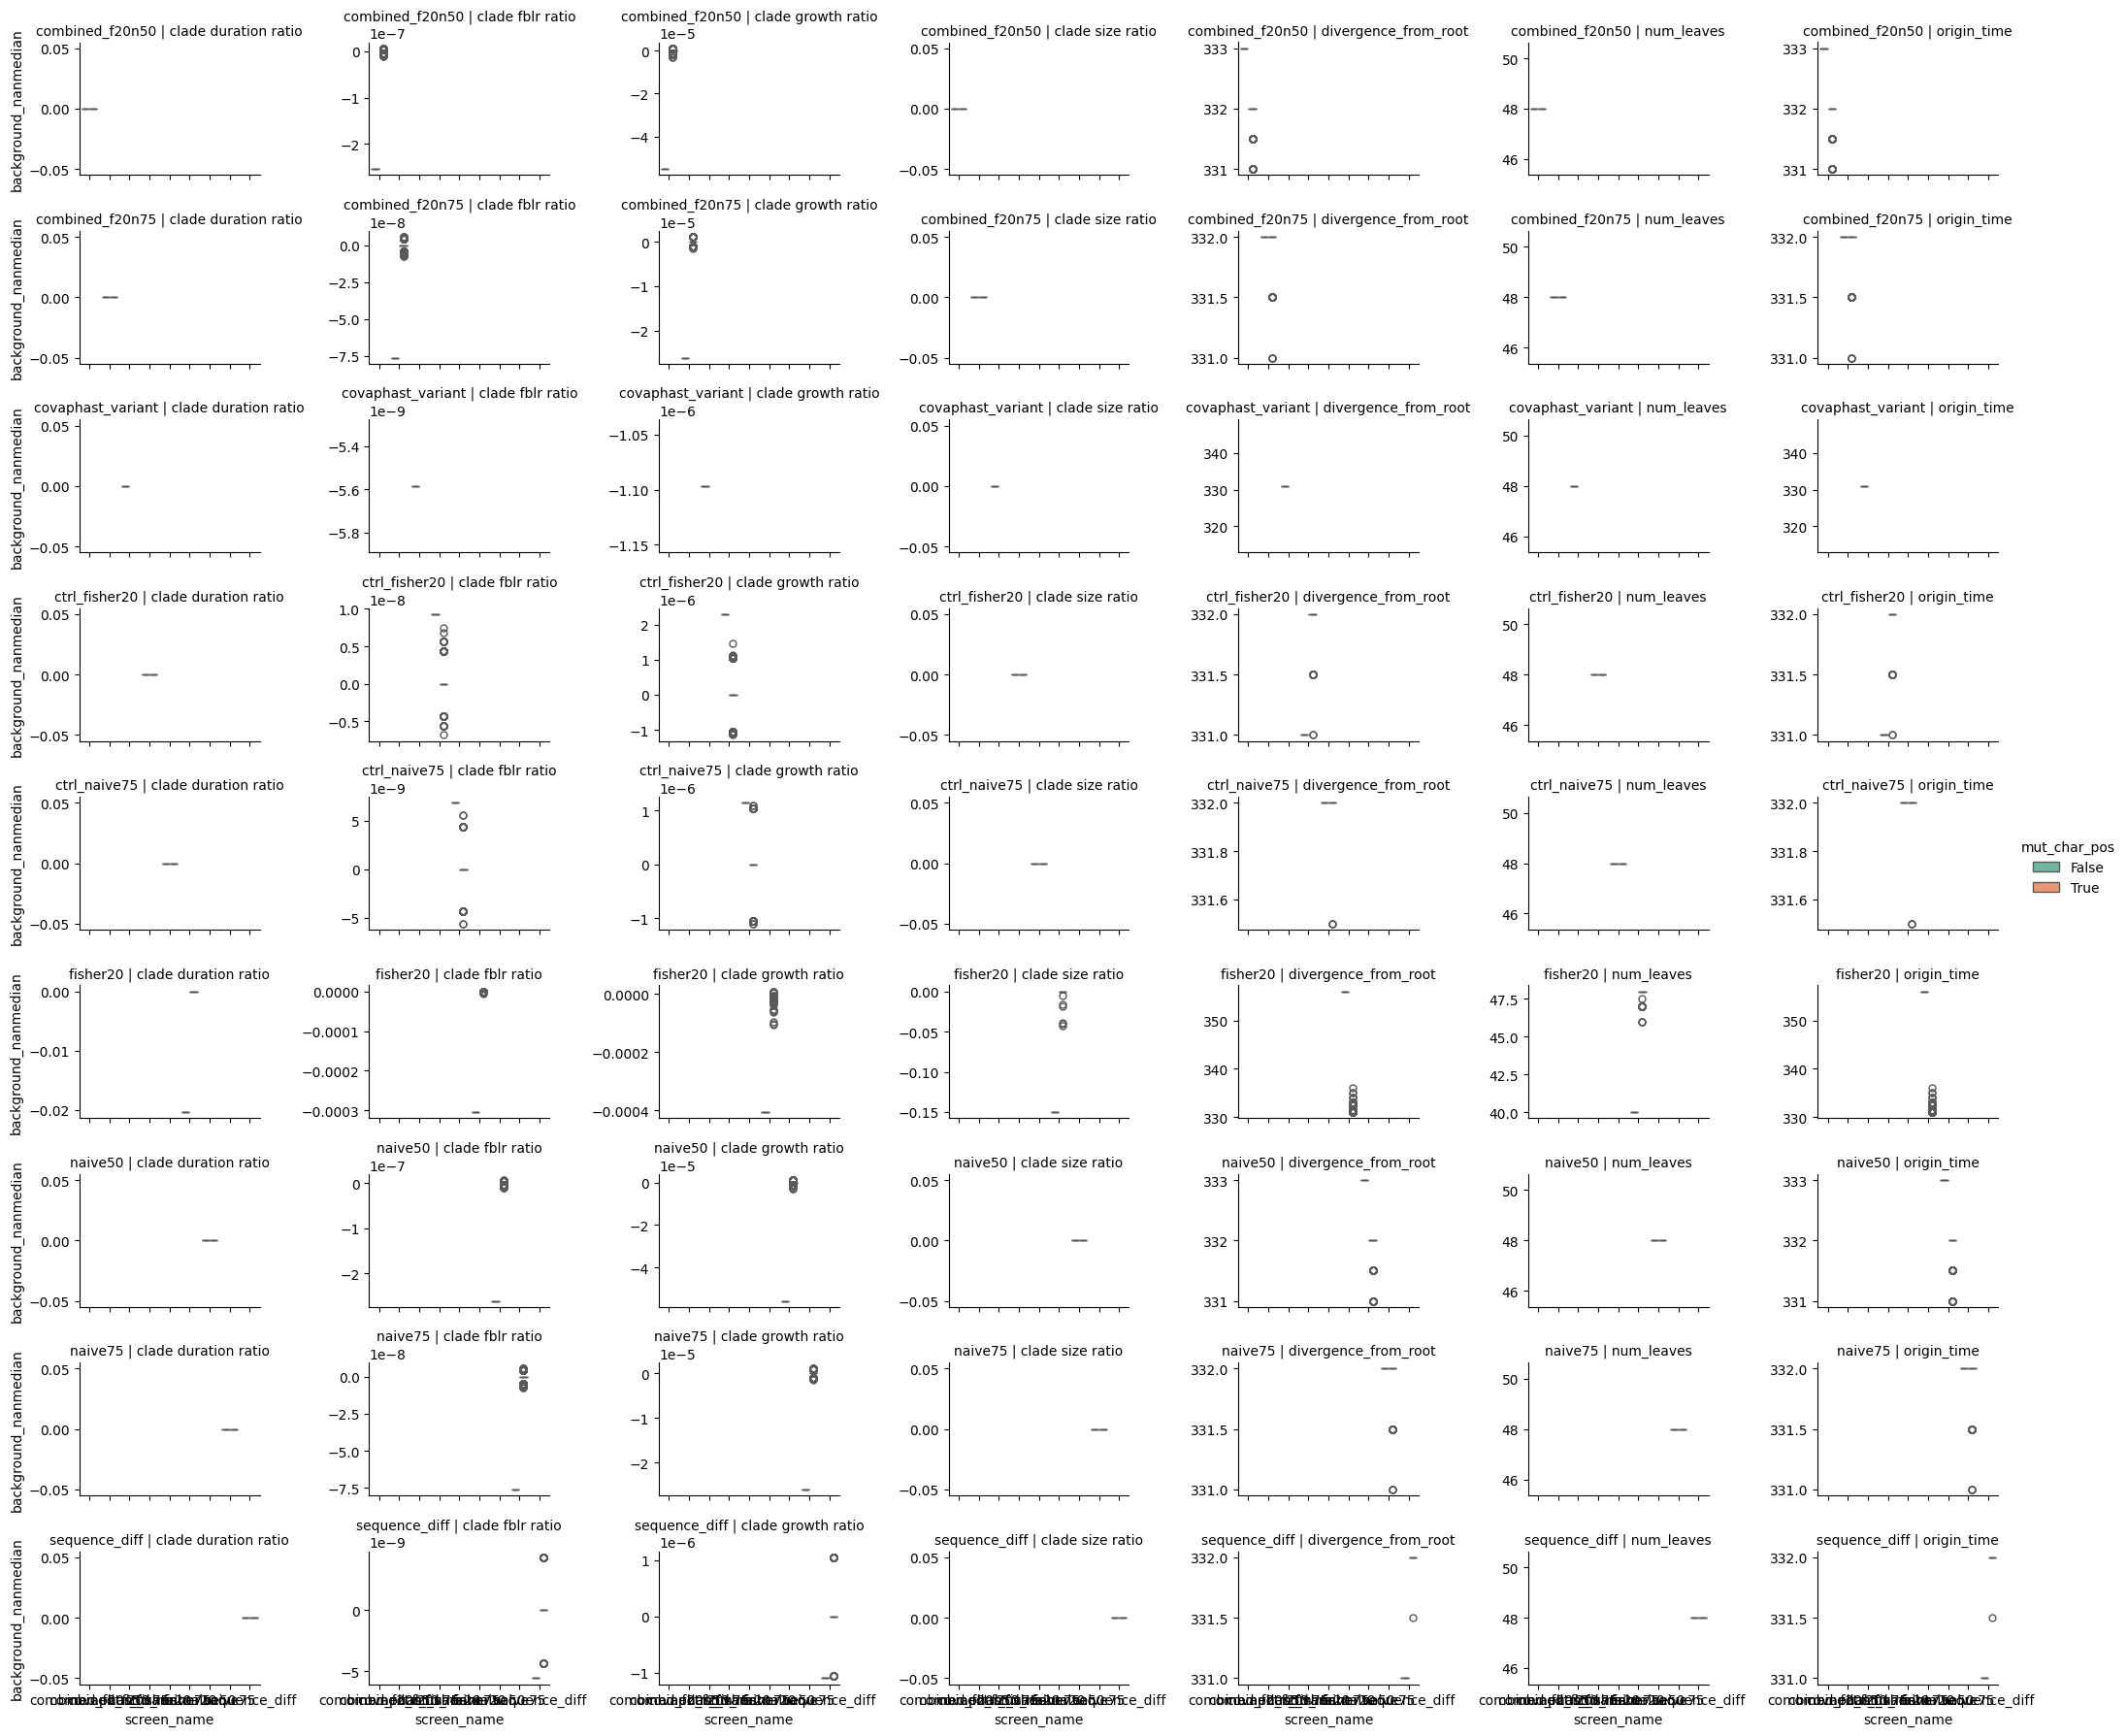

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
